In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import synapseclient
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

# Shiao 2024 dataset
Source: https://0-www-ncbi-nlm-nih-gov.brum.beds.ac.uk/geo/query/acc.cgi?acc=GSE246613

Stored at: https://www.synapse.org/#!Synapse:syn54861463

In [2]:
syn = synapseclient.Synapse()
syn.login()

Welcome, heimann!



## Loading data

In [3]:
#Load data
entity = syn.get('syn54861463')
adata = sc.read_h5ad(entity.path)

adata

AnnData object with n_obs × n_vars = 342749 × 36601
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'percent_mito', 'n_counts', 'percent_ribo', 'scrublet', 'batch', 'CD45_enrich', 'batch_num', 'cohort', 'pCR', 'RCB', 'cleared_nodes', 'treatment', 'patient_treatment', 'hormone_receptor', 'combined_tcr', 'umap1', 'umap2', 'leiden_50nbr_res1.2', 'celltype', 'global_clusters', 'bcell_leiden_nbr100_res0.6', 'tcell_leiden_nbr100_res0.6', 'myeloid_leiden_nbr30_res0.8', 'subcluster'
    var: 'gene_ids', 'feature_types'
    uns: 'bcell_leiden_nbr100_res0.6_colors', 'celltype_colors', 'global_clusters_colors', 'leiden_50nbr_res1.2_colors', 'myeloid_leiden_nbr30_res0.8_colors', 'subcluster_colors', 'tcell_leiden_nbr100_res0.6_colors'
    obsm: 'X_bcell_umap', 'X_myeloid_umap', 'X_tcell_umap', 'X_umap'

In [7]:
pd.DataFrame({
    'cohort': adata.obs["cohort"],
    'patient_treatment': adata.obs["patient_treatment"],
    'cell_type': adata.obs["celltype"],
    'cleared_nodes': adata.obs["cleared_nodes"],
    'hormone_receptor': adata.obs["hormone_receptor"],
    'pCR': adata.obs["pCR"],
    'RCB': adata.obs["RCB"],
    'treatment': adata.obs["treatment"],
    'combined_tcr': adata.obs["combined_tcr"],
    'umap1': adata.obs["umap1"],
    'umap2': adata.obs["umap2"]
    }
).to_csv("shiao_h5ad_obs.csv")

### Clinical Data

In [4]:
# Some annotation in obs seem to be clinical annotation
pd.DataFrame({
        'cell_type': adata.obs["celltype"],
        'cohort': adata.obs["cohort"],
        'cleared_nodes': adata.obs["cleared_nodes"],
        'hormone_receptor': adata.obs["hormone_receptor"],
        'pCR': adata.obs["pCR"],
        'RCB': adata.obs["RCB"],
        'treatment': adata.obs["treatment"],
        'patient_treatment': adata.obs["patient_treatment"],
    }
)

,cell_type,cohort,cleared_nodes,hormone_receptor,pCR,RCB,treatment,patient_treatment
h01A_P_AAACCTGAGACAGACC,myeloid,Patient01,Y,TNBC,R,0,Base,Patient01_Base
h01A_P_AAACCTGAGATGTGTA,myeloid,Patient01,Y,TNBC,R,0,Base,Patient01_Base
h01A_P_AAACCTGAGCGCTTAT,myeloid,Patient01,Y,TNBC,R,0,Base,Patient01_Base
h01A_P_AAACCTGAGGCCCGTT,Bcell,Patient01,Y,TNBC,R,0,Base,Patient01_Base
h01A_P_AAACCTGAGGTTACCT,Tcell,Patient01,Y,TNBC,R,0,Base,Patient01_Base
...,...,...,...,...,...,...,...,...
h66C_P_TTCTACATCGCGTAGC,Tcell,Patient66,unknown,TNBC,R,unknown,RTPD1,Patient66_RTPD1
h66C_P_TTCTCCTAGGAATTAC,Bcell,Patient66,unknown,TNBC,R,unknown,RTPD1,Patient66_RTPD1
h66C_P_TTCTCCTAGTTAGGTA,Tcell,Patient66,unknown,TNBC,R,unknown,RTPD1,Patient66_RTPD1
h66C_P_TTGGAACAGAGCTATA,Tcell,Patient66,unknown,TNBC,R,unknown,RTPD1,Patient66_RTPD1


In [5]:
#Inspect more closely unique values for each column
pd.unique(adata.obs["pCR"])

['R', 'NR']
Categories (3, object): ['NR', 'R', 'unknown']

### UMAP coordinates

They are stored in the obs

In [6]:
pd.DataFrame({
        'umap_1': adata.obs["umap1"],
        'umap_2': adata.obs["umap2"]
    }
)

,umap_1,umap_2
h01A_P_AAACCTGAGACAGACC,12.238769,-7.196668
h01A_P_AAACCTGAGATGTGTA,5.326361,-0.320588
h01A_P_AAACCTGAGCGCTTAT,14.234969,0.425975
h01A_P_AAACCTGAGGCCCGTT,1.327492,15.696615
h01A_P_AAACCTGAGGTTACCT,-9.247342,-2.434366
...,...,...
h66C_P_TTCTACATCGCGTAGC,-9.126049,1.260052
h66C_P_TTCTCCTAGGAATTAC,2.544263,2.465940
h66C_P_TTCTCCTAGTTAGGTA,-3.930299,0.801832
h66C_P_TTGGAACAGAGCTATA,-5.860061,5.020553


### Counts

In [7]:
#let's take a look at the raw counts
adata.layers['counts'] = adata.X
adata.to_df(layer = "counts")

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.5,AL627309.4,AP006222.2,AL732372.1,...,AC133551.1,AC136612.1,AC136616.1,AC136616.3,AC136616.2,AC141272.1,AC023491.2,AC007325.1,AC007325.4,AC007325.2
h01A_P_AAACCTGAGACAGACC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h01A_P_AAACCTGAGATGTGTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h01A_P_AAACCTGAGCGCTTAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h01A_P_AAACCTGAGGCCCGTT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h01A_P_AAACCTGAGGTTACCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
h66C_P_TTCTACATCGCGTAGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h66C_P_TTCTCCTAGGAATTAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h66C_P_TTCTCCTAGTTAGGTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h66C_P_TTGGAACAGAGCTATA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# QC

This file already has QC metrics in the obs, so we just need to plot them to get a sense if any additional filtering is needed.

According to the study manuscript, the following steps were performed:

*Doublet cells were identified using Scrublet61 (version 0.2.1) from the filtered feature bar- code matrices produced by Cellranger. Scrublet was run using the 10% highest variable genes, identified using the Scanpy scan- py.pp.highly_variable_genes function (scanpy version 1.5.1), with an expected doublet rate of 10%. Cells were scored as candidate doublets by Scrublet and removed if their doublet score exceeded 0.25. In addition, the top 1% of cells by UMI count per biopsy were filtered as presumed doublets. Remaining cells were finally filtered to have less than 10% of their UMI’s mapped to mitochondrial genes and to express greater than 100 genes.*

In [8]:
#checking the first filtering criteria
pd.DataFrame.describe(adata.obs['scrublet'])

count     342749
unique         1
top        False
freq      342749
Name: scrublet, dtype: object

This metric appears to be a True/False flag, and only False was selected 

Text(0, 0.5, 'N cells')

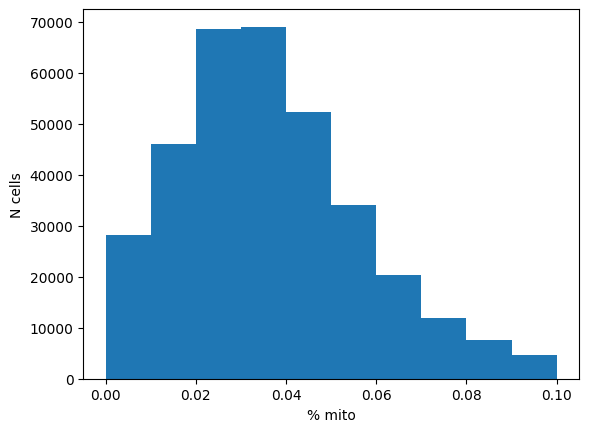

In [9]:
plt.hist(adata.obs['percent_mito'])
plt.xlabel('% mito')
plt.ylabel('N cells')

In [10]:
pd.DataFrame.describe(adata.obs['percent_mito'])

count    342749.000000
mean          0.036326
std           0.020382
min           0.000000
25%           0.021826
50%           0.033920
75%           0.048350
max           0.099983
Name: percent_mito, dtype: float64

We can see from this data that the authors already filtered cells with mito_frac > 10% (as mentioned in the manuscript)

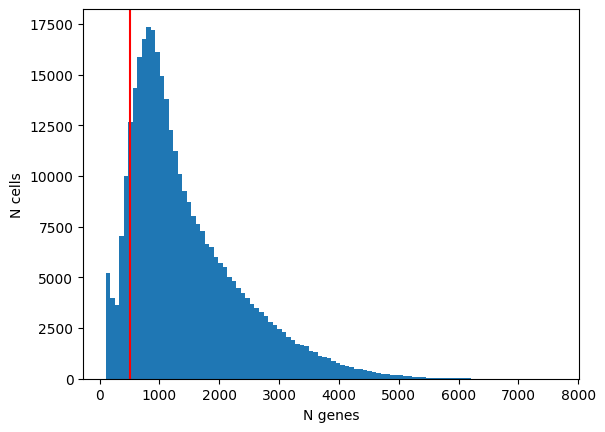

In [11]:
#plot histogram of number of unique genes by cells
plt.hist(adata.obs['n_genes_by_counts'], bins=100)
plt.xlabel('N genes')
plt.ylabel('N cells')
plt.axvline(500, color='red')
#plt.xlim(0,4e3)

In [12]:
pd.DataFrame.describe(adata.obs['n_genes_by_counts'])

count    342749.000000
mean       1438.869137
std         934.276157
min         101.000000
25%         763.000000
50%        1171.000000
75%        1916.000000
max        7639.000000
Name: n_genes_by_counts, dtype: float64

From this plot, we can see that the filter of >100 genes per count mentioned in the manuscript was applied.

#### So, it appears that we already have a file with data that went through pre-processing. No further filtering will be made to the original file.

# Formatting to run pseudobulk

In [13]:
#do we have normalized counts?

# save raw counts as a layer
adata.layers['counts'] = adata.X

#pd.DataFrame.describe(adata.to_df(layer = "counts"))

In [14]:
# Normalize and log-transform
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.layers['normalized'] = adata.X


In [15]:
adata

AnnData object with n_obs × n_vars = 342749 × 36601
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'percent_mito', 'n_counts', 'percent_ribo', 'scrublet', 'batch', 'CD45_enrich', 'batch_num', 'cohort', 'pCR', 'RCB', 'cleared_nodes', 'treatment', 'patient_treatment', 'hormone_receptor', 'combined_tcr', 'umap1', 'umap2', 'leiden_50nbr_res1.2', 'celltype', 'global_clusters', 'bcell_leiden_nbr100_res0.6', 'tcell_leiden_nbr100_res0.6', 'myeloid_leiden_nbr30_res0.8', 'subcluster'
    var: 'gene_ids', 'feature_types'
    uns: 'bcell_leiden_nbr100_res0.6_colors', 'celltype_colors', 'global_clusters_colors', 'leiden_50nbr_res1.2_colors', 'myeloid_leiden_nbr30_res0.8_colors', 'subcluster_colors', 'tcell_leiden_nbr100_res0.6_colors', 'log1p'
    obsm: 'X_bcell_umap', 'X_myeloid_umap', 'X_tcell_umap', 'X_umap'
    layers: 'counts

In [20]:
#adata.write('shiao_iatlas.h5ad')
file_entity = synapseclient.File('shiao_iatlas.h5ad', 'syn54859246')
file_entity = syn.store(file_entity)


##################################################
 Uploading file to Synapse storage 
##################################################

